# <p style="text-align:center;#D3D3D3;font-size:44px;font-weight:bolder;padding:0.3em 0 0.5em;border-radius:10px 10px;font-stretch: 125%;margin:0;line-height:115%;">🧱 CONCRETE COMPRESSIVE STRENGTH PREDICTION 🧱</p>

***
🪦 Problem Statement:
=================
The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. 

The strength of the concrete is also a vital aspect in achieving the requisite longevity. 
It will take 28 days to test strength, which is a long period. 

So, what will we do now? We can save a lot of time and effort by using Data Science 
to estimate how much quantity of which raw material we need for acceptable compressive strength
***

❇️ AIM : 

To build a solution that should able to predict the compressive strength of the concrete.(Using Machine Learning)

❇️ APPROACH: 

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. 
           Different machine learning algorithms that’s best fit for the above case will be tried out.

***

<a id="1"></a>
# <p style="text-align:Left; color:#F6F6F6; background-color:#696969; font-size:40px; font-weight:bolder; padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;"> ❇️  CONTENTS</p>

Life cycle of Machine learning Project
1. [Overview](#1.0) - Understanding the Problem Statement
2. [Import the necessary libraries](#2.0)
3. [Data Collection](#3.0)
4. [Data Checks to perform](#4.0)
	- [4.1 Check Duplicates](#4.1)
	- [4.2 Drop Duplicates](#4.2)
	- [4.3 Check Outliers](#4.3)
	- [4.4 Working with Outliers: Correcting, Removing](#4.4)
	- [4.5 Check Outliers after correction](#4.5)
	- [4.6 Check Missing Values](#4.6)
5. [EDA (Data Analysis and Preparation)](#5.0)
	- [5.1 Variable Identification](#5.1)
	- [5.2 Univariate Analysis](#5.2)
	- [5.3 Study Summary Statistics](#5.3)
	- [5.4 Multivariate Analysis](#5.4)
	- [5.5 Study Correlation](#5.5)
	- [5.6 EDA (Exploratory Data Analysis) Summary](#5.6)
6. [Feature Engineering](#6.0)
	- [6.1 Variable Creation](#6.1)
10. [Conclusion](#10.0)



Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model


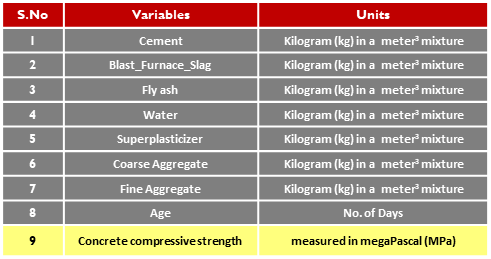


<a id="1"></a>
# <p style="text-align:center; color:#F6F6F6; background-color:#696969; font-size:40px; font-weight:bolder; padding:0.3em 0 0.4em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">IMPORTING LIBRARIES 📚</p>

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys

import missingno as mno

import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;">LOADING DATA 💾</p>

### 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
- Additional Information
    - Number of instances 	1030
    - Number of Attributes	9
    - Attribute breakdown	8 quantitative input variables, and 1 quantitative output variable
    - Missing Attribute Values	None 

    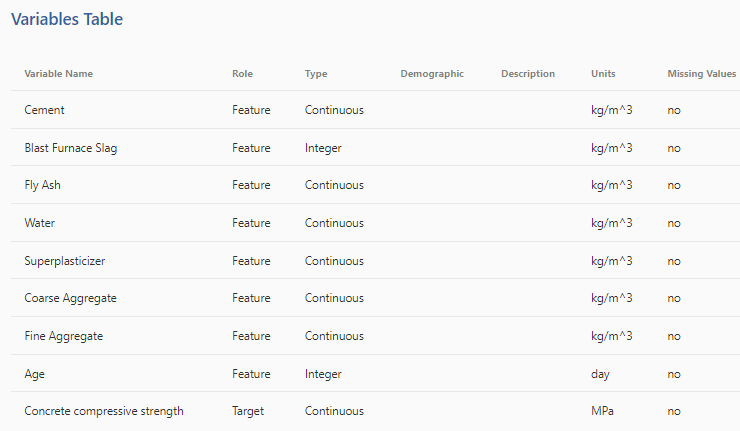



In [2]:
# loading the dataset
dataset = pd.read_csv("data/concrete_data.csv")

In [3]:
target = dataset['concrete_compressive_strength']
features = dataset.iloc[:-1]

In [4]:
original_dataset = dataset.copy
display(dataset.head())

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [5]:
print('\n\033[1mINFORMATION    :\033[0m \nThe Datset consists of \nFeatures       =  {}  \nTotal Samples  =  {}'.format(dataset.shape[1], dataset.shape[0]))


INFORMATION    : 
The Datset consists of 
Features       =  9  
Total Samples  =  1030


<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> 🔎 DATA EXPLORATION 🔍</p>

 Check Missing values
 Check Duplicates 
 Check data type
 Check the number of unique values of each column
 Check statistics of data set
 Check various categories present in the different categorical column

In [6]:
dataset.describe().T

count        mean         std     min  \
cement                         1030.0  281.167864  104.506364  102.00   
blast_furnace_slag             1030.0   73.895825   86.279342    0.00   
fly_ash                        1030.0   54.188350   63.997004    0.00   
water                          1030.0  181.567282   21.354219  121.80   
superplasticizer               1030.0    6.204660    5.973841    0.00   
coarse_aggregate               1030.0  972.918932   77.753954  801.00   
fine_aggregate                 1030.0  773.580485   80.175980  594.00   
age                            1030.0   45.662136   63.169912    1.00   
concrete_compressive_strength  1030.0   35.817961   16.705742    2.33   

                                   25%      50%       75%     max  
cement                         192.375  272.900   350.000   540.0  
blast_furnace_slag               0.000   22.000   142.950   359.4  
fly_ash                          0.000    0.000   118.300   200.1  
water                          164.900  185.000   192.000   247.0  
superplasticizer                 0.000    6.400    10.200    32.2  
coarse_aggregate               932.000  968.000  1029.400  1145.0  
fine_aggregate                 730.950  779.500   824.000   992.6  
age                              7.000   28.000    56.000   365.0  
concrete_compressive_strength   23.710   34.445    46.135    82.6

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

1) In the given dataset, All the columns are numerical  
2) All the columns datatype belong to float64,  Except for the column 'age' 
3) The data has 8 quantitative input variables and 1 quantitative output variable - concrete_compressive_strength

In [8]:
# Checking for missing values
dataset.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

<Axes: >

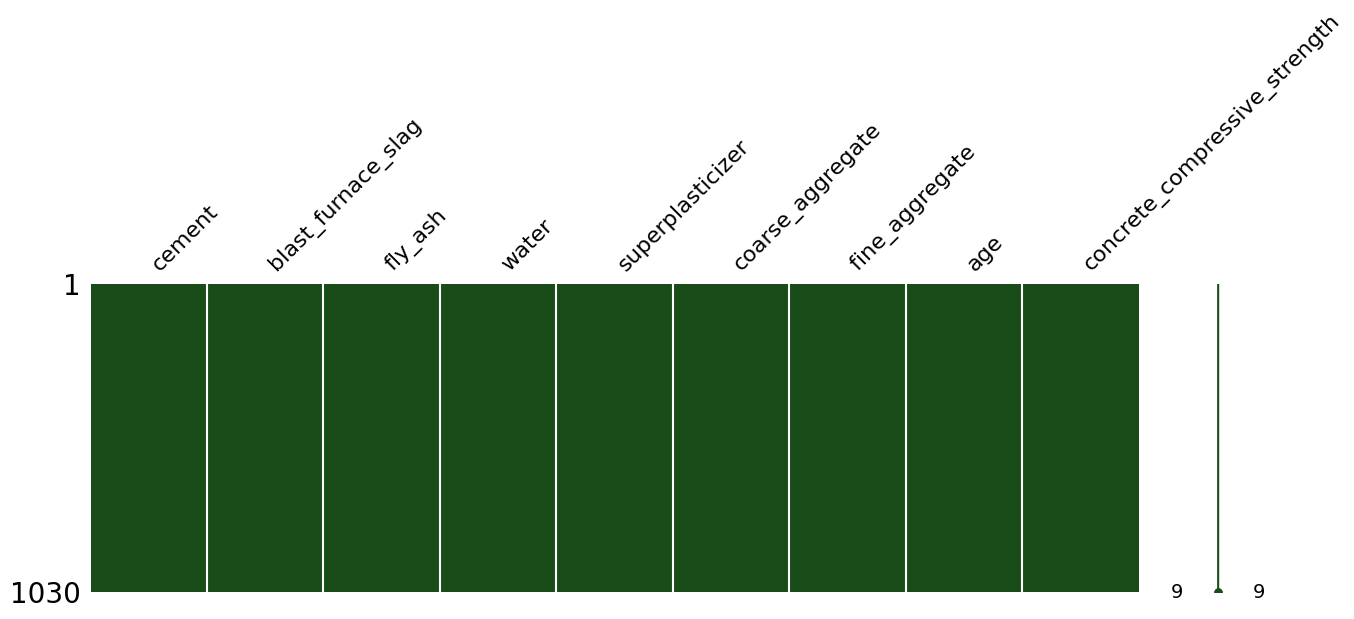

In [9]:
# Visualize missing values
mno.matrix(dataset, figsize=(15, 4), color=(0.1, 0.3, 0.1))

<p style = "font-size:20px; color: #FFF200 "><strong> NO NULL VALUES </strong></p> 

In [10]:
#Checking number of unique rows in each feature

dataset.nunique().sort_values()

age                               14
superplasticizer                 111
fly_ash                          156
blast_furnace_slag               185
water                            195
cement                           278
coarse_aggregate                 284
fine_aggregate                   302
concrete_compressive_strength    845
dtype: int64

In [11]:
# Checking the dataset for duplicates

print("The number of duplicated rows = ", dataset.duplicated().sum())

The number of duplicated rows =  25


In [12]:
# Viewing the duplicate records
duplicates = dataset.duplicated()

dataset[duplicates]

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
809   252.0                 0.0      0.0  185.0               0.0   

     coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
77              852.1            887.1    3                          33.40  
80              852.1            887.1    3                          33.40  
86              944.7            755.8    3                          35.30  
88              944.7            755.8    3                          35.30  
91              944.7            755.8    3                          35.30  
100             852.1            887.1    7                          49.20  
103             852.1            887.1    7                          49.20  
109             944.7            755.8    7                          55.90  
111             944.7            755.8    7                          55.90  
123             852.1            887.1   28                          60.29  
126             852.1            887.1   28                          60.29  
132             944.7            755.8   28                          71.30  
134             944.7            755.8   28                          71.30  
137             944.7            755.8   28                          71.30  
146             852.1            887.1   56                          64.30  
149             852.1            887.1   56                          64.30  
155             944.7            755.8   56                          77.30  
157             944.7            755.8   56                          77.30  
160             944.7            755.8   56                          77.30  
169             852.1            887.1   91                          65.20  
172             852.1            887.1   91                          65.20  
177             944.7            755.8   91                          79.30  
179             944.7            755.8   91                          79.30  
182             944.7            755.8   91                          79.30  
809            1111.0            784.0   28                          19.69

In [13]:
# Delete duplicate rows
dataset.drop_duplicates(inplace=True)

In [14]:
print('\n\033[1mINFORMATION    :\033[0m \nAfter dropping the duplicates, the Dataset contains now \nFeatures       =  {}  \nTotal Samples  =  {}'.format(dataset.shape[1], dataset.shape[0]))


INFORMATION    : 
After dropping the duplicates, the Dataset contains now 
Features       =  9  
Total Samples  =  1005


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

1) In the given dataset, 25 duplicate rows were found 
2) All the duplicatie rows were dropped from the dataset
3) Initially the dataset had 1030 rows and now after dropping the dataset has now has 1005 rows. 

lets move on to Data Visualization

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> DATA VISUALIZATION 📈📊 </p>

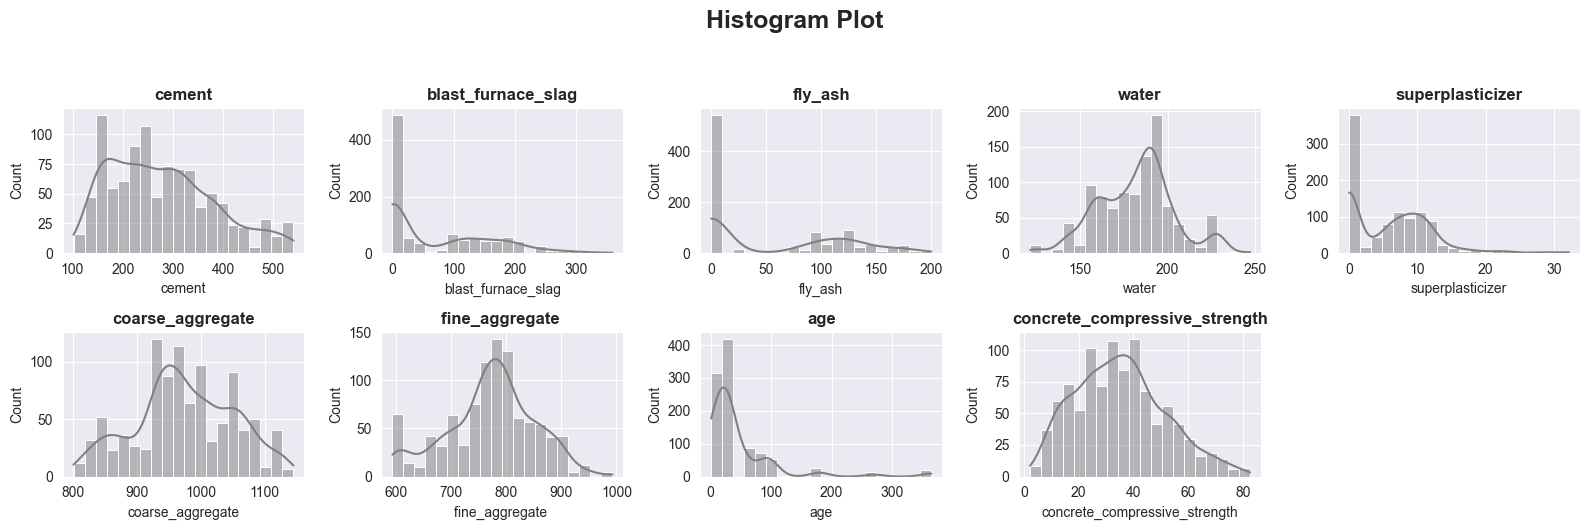

In [15]:
# Plotting  histograms for all the  variables

sns.set_style('darkgrid')
plt.figure(figsize=(16, 5))
plt.suptitle('Histogram Plot', y=1.05, weight='bold', fontsize =18)
for n, col in enumerate(dataset):
    plt.subplot(2, 5, n + 1)
    sns.histplot(data= dataset, x=col, kde=True, color = 'gray', bins=20)
    plt.title(f'{col}', weight = 'bold')
plt.tight_layout()
plt.show()

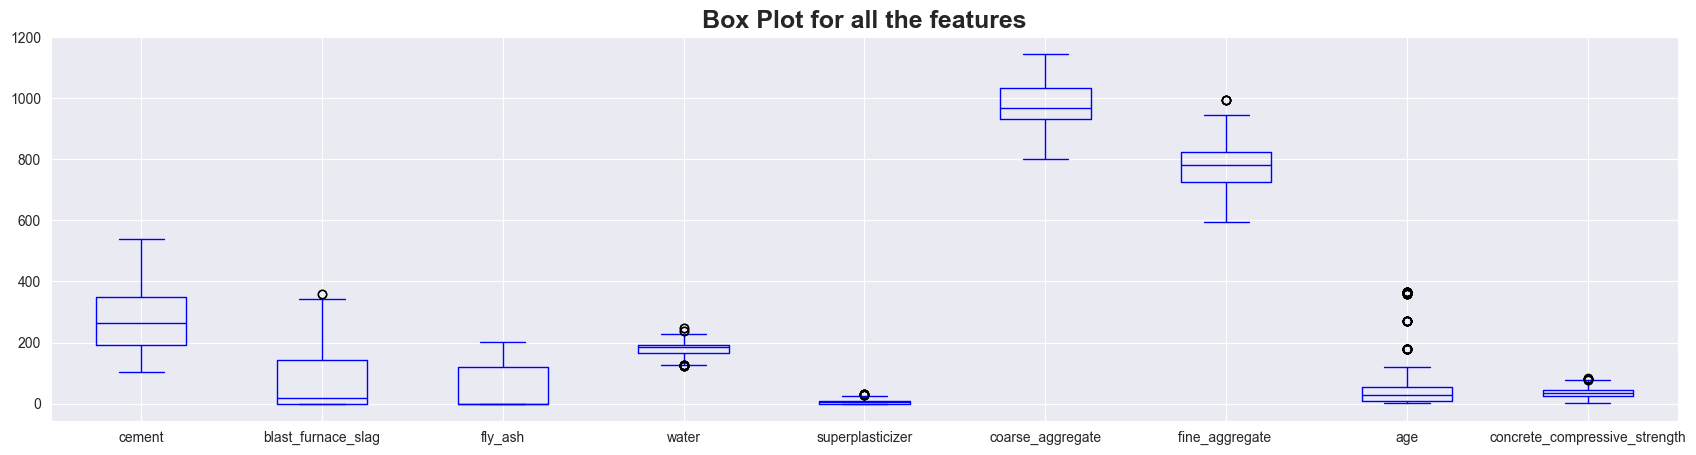

In [16]:
# Box plots for numerical variables
plt.figure(figsize=(21, 5))
plt.title('Box Plot for all the features', y=1, weight='bold', fontsize =18)  
dataset.boxplot(column = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 
            'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'concrete_compressive_strength'], color='blue');

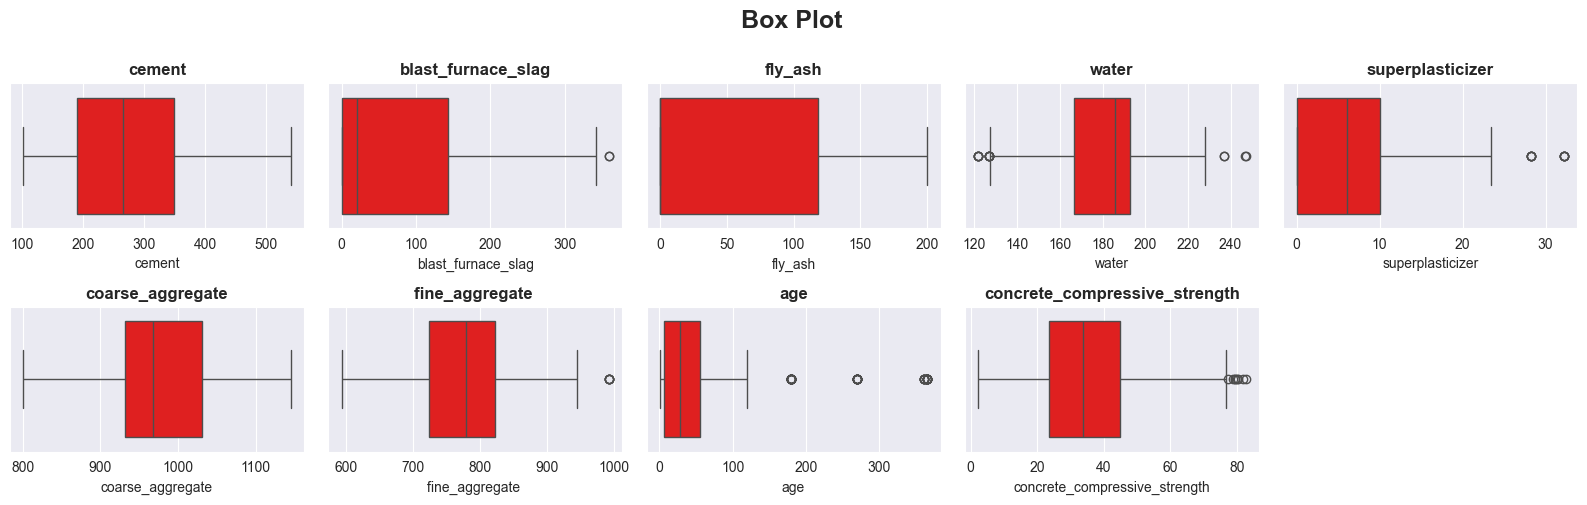

In [17]:
# Box plots for numerical variables
plt.figure(figsize=(16, 5))
plt.suptitle('Box Plot', y=1, weight='bold', fontsize =18)  
for n, features in enumerate(dataset):
    plt.subplot(2, 5, n + 1)
    sns.boxplot(data=dataset, x = features, color='red', legend=False)
    plt.title(f'{features}', weight='bold')
plt.tight_layout()
plt.show()

<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 
 
From the 2 box plots above --> Slag, Water, Superplasticizer, Fine aggregate, Age and CC_Strength columns have outliers and needs to be treated.

In [18]:
# Removing outliers by standard methods and Plotting graphs:
df_outliers = pd.DataFrame(dataset.loc[:,])

for col in df_outliers:
  # Using IQR method to define the range of inliners:
  q1, q3, median = dataset[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df_outliers[col] = np.where(df_outliers[col] > upper_limit, median,np.where(
                         df_outliers[col] < lower_limit,median,df_outliers[col]))

In [19]:
dataset = df_outliers.copy()

In [20]:
# Box plots after treating outliers
fig = make_subplots(rows = 2, cols = 5, subplot_titles=tuple(dataset.columns))

for n , feature in enumerate(dataset.columns, start = 1):
    row = (n - 1) // 5 + 1 
    col = (n - 1) % 5 + 1
    fig.add_trace(go.Box(y=dataset[feature], name = feature), row = row, col= col)

fig.update_layout(height = 500, width = 1500, title_text = "____________________________________Box plots after treating outliers__________________________________")
fig.show()


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

most of the outliers have been treated

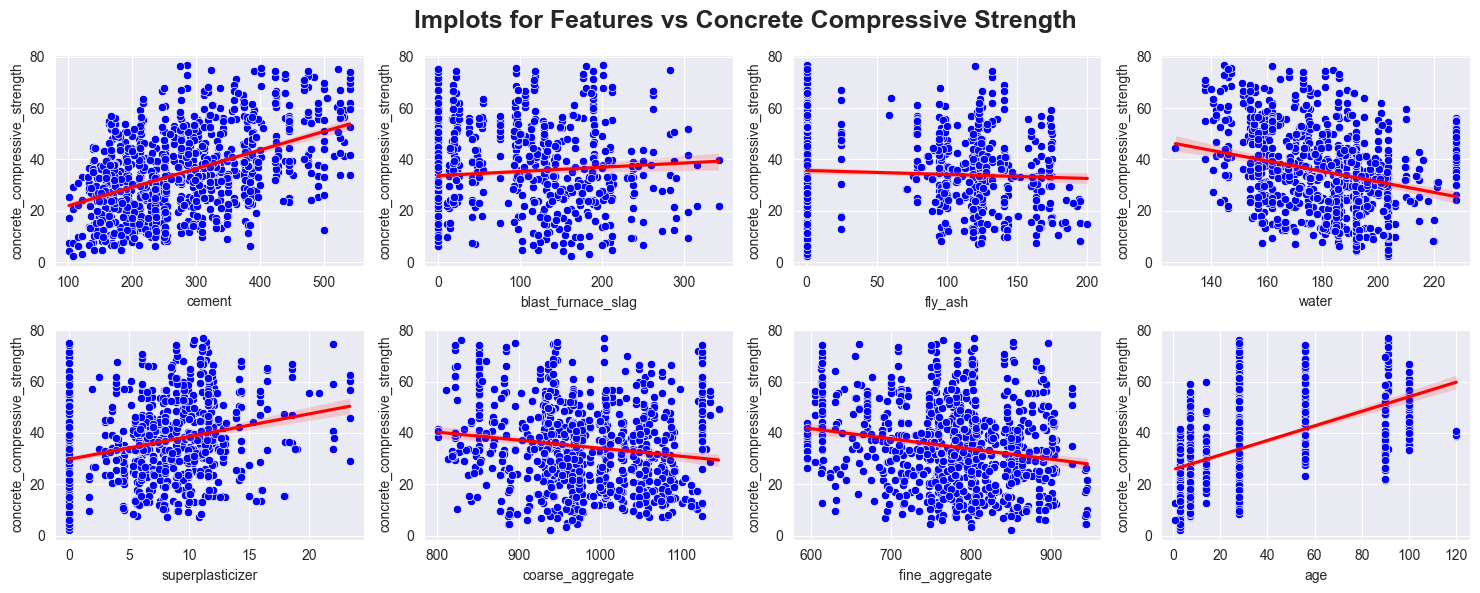

In [21]:
# Assuming 'dataset' is your DataFrame and 'concrete_compressive_strength' is the target variable
target_column_name = 'concrete_compressive_strength'

# List of features
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 
            'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
fig.suptitle('lmplots for Features vs Concrete Compressive Strength', fontsize=18, weight='bold')

# Flatten the axes array
axes = axes.flatten()

# Create lmplots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=target_column_name, data=dataset, ax=axes[i], color = 'b')
    sns.regplot(x=feature, y=target_column_name, data=dataset, scatter=False, ax=axes[i], color = 'r')

# Remove any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [22]:
# Define custom bin edges
bins = [0, 20, 40, 60, 85]

# Define corresponding bin labels
bin_labels = ["0 to 20", "20 to 40", "40 to 60", "60 to 85"]

# Create bins using pd.cut()
bin_categories = pd.cut(dataset['concrete_compressive_strength'], bins=bins, labels=bin_labels)

# Create a copy of the dataset
dataset1 = dataset.copy()

# Add bins to the copied dataset
dataset1['bins'] = bin_categories


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


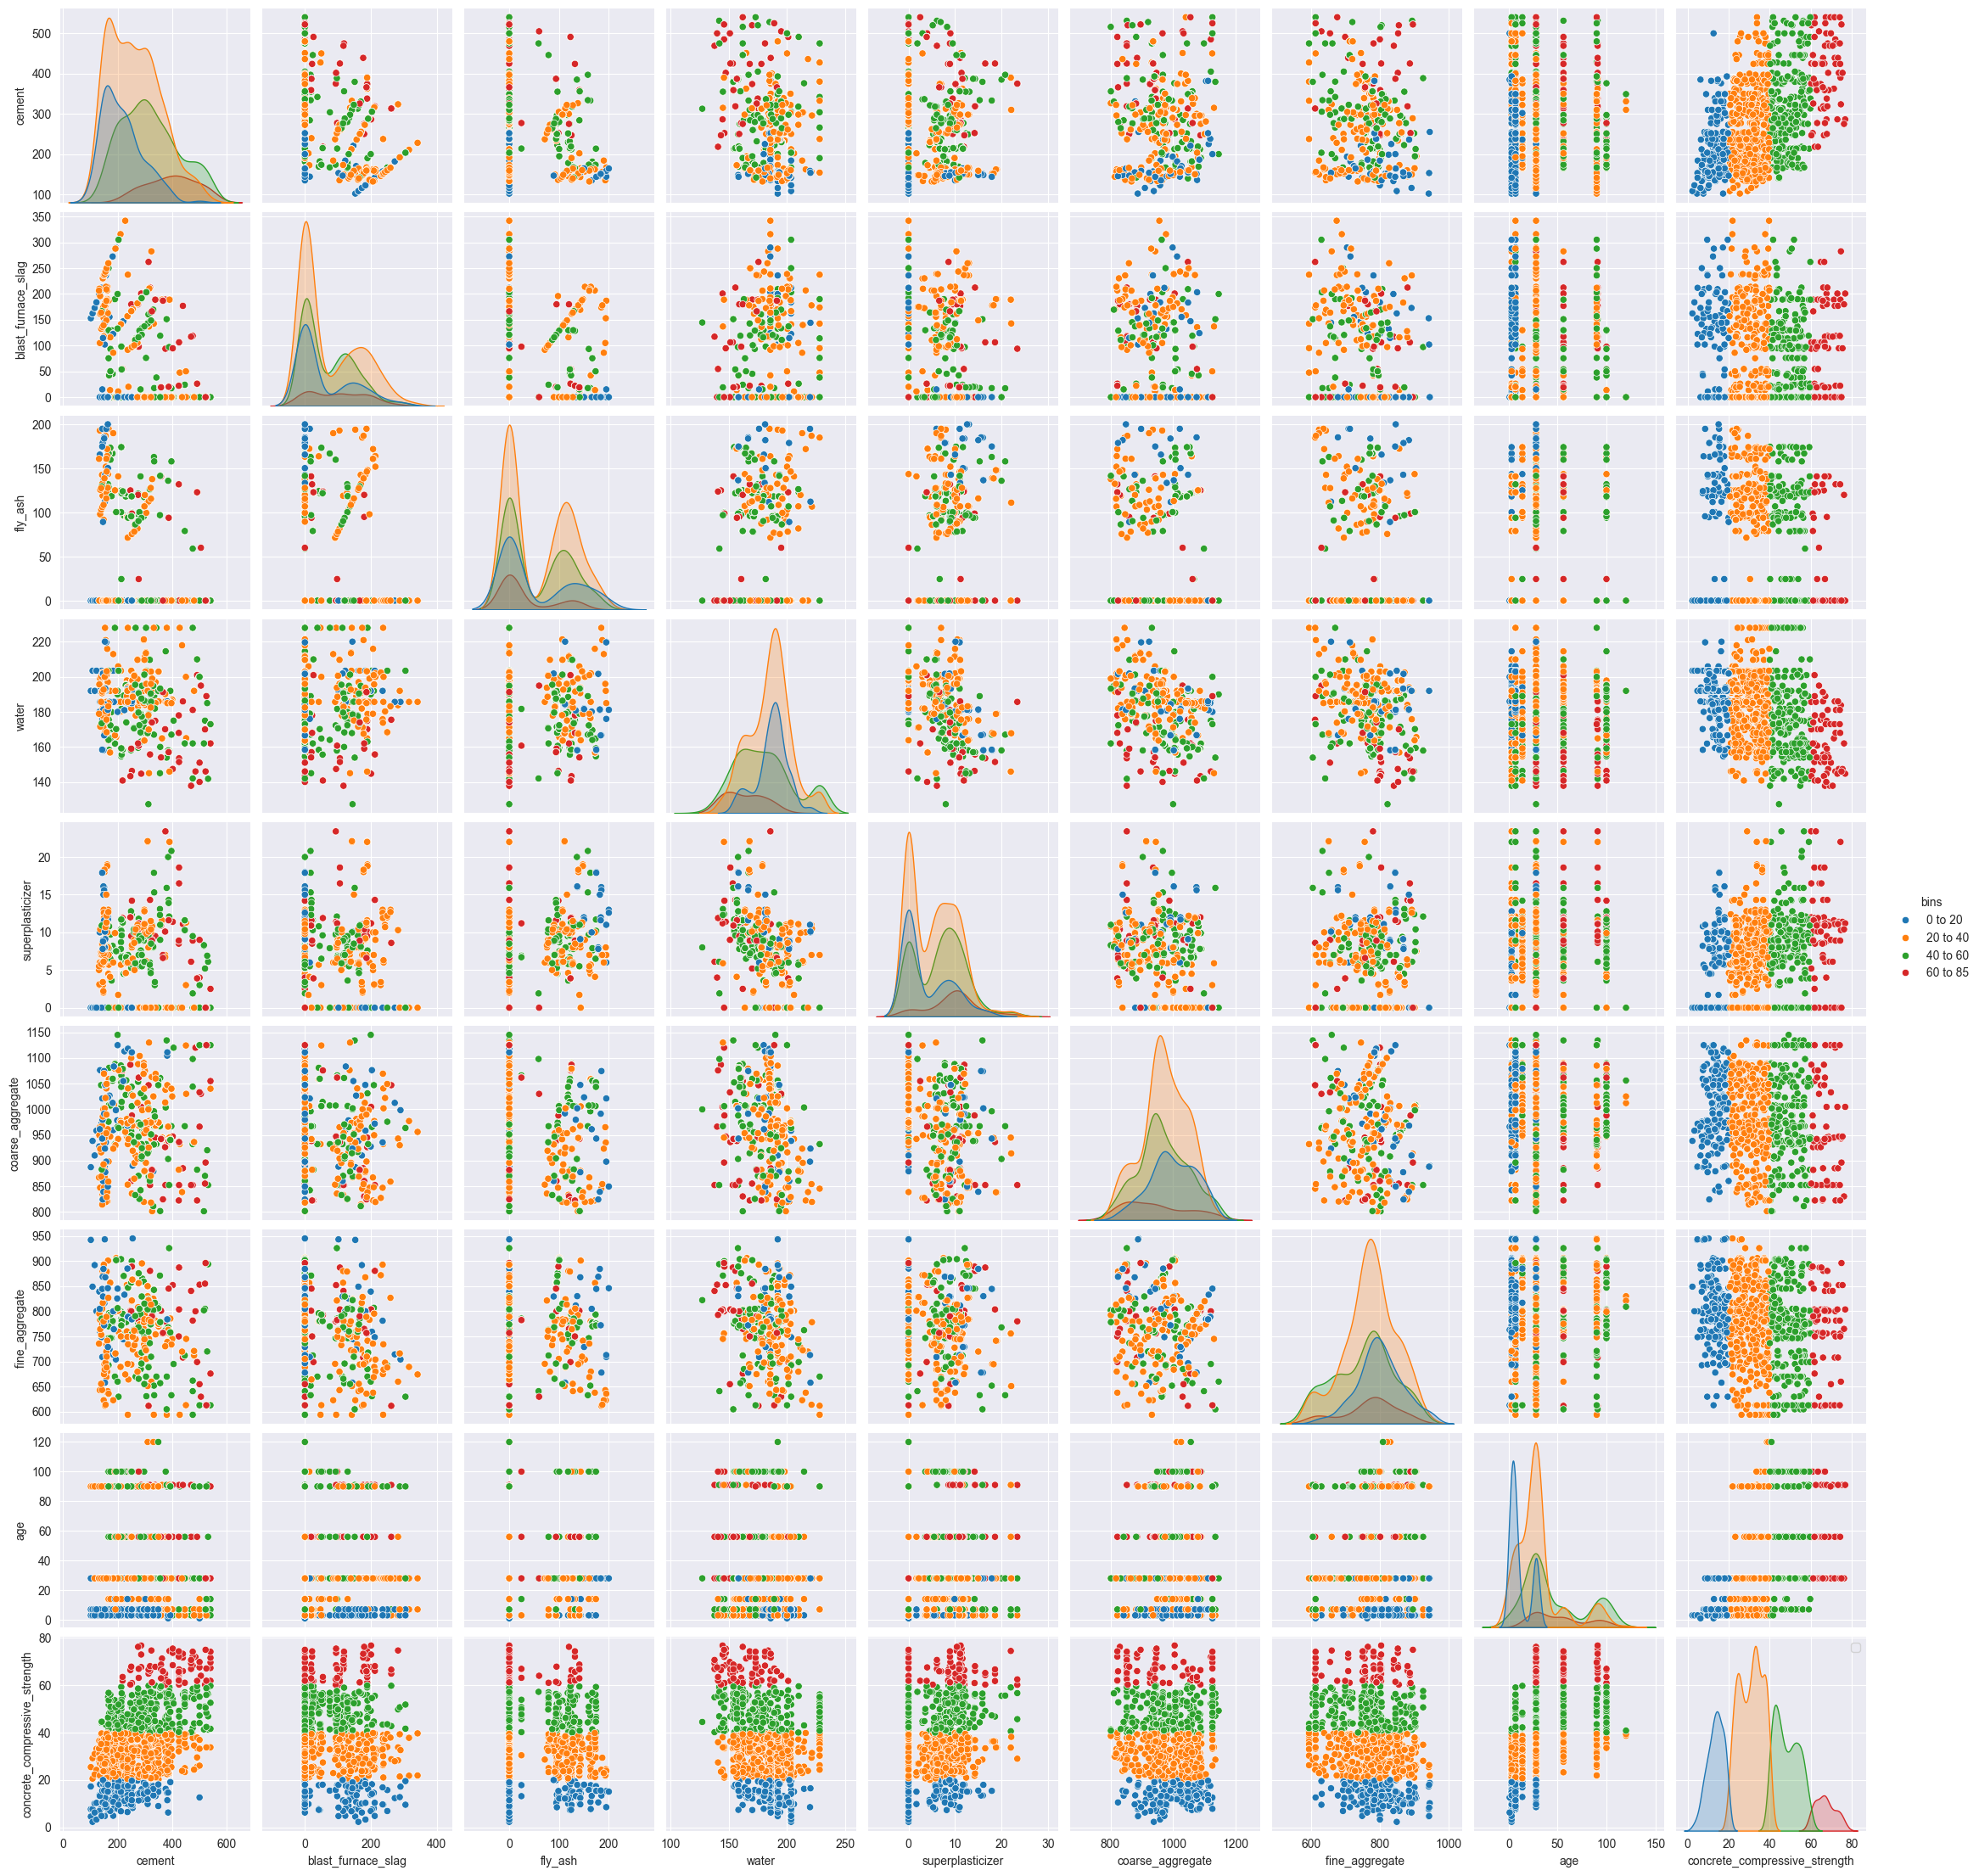

In [23]:
# Pairwise plots of all the  variables
sns.pairplot(dataset1, hue='bins')
plt.legend()
plt.show()

<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

 * From the pair plots, a Right skewed distribution is observed for majority of the features. Except for the aggregates and water. 
 * At least 2 Gaussian (2 peaks) in furnace_Slag, fly_Ash, Superplasticer and Age, even though it's not unsupervised learning but in this dataset there are at least 2 clusters and there may be more.
 * Majority of the dataset is seen in the Range between 20 to 40 mPa for the concrete strength. 


<p style = "font-size:20px; color: #FF00200 "><strong> Relationship between independent features </strong></p> 

1) $Cement$ : Widely spread data can be observed , with a linear increase for most of the other features.

2) $Burnt-furnace-slag$ : Seems to have a large amount of right skewed and clustered below 200 kg  $m^3$ for most of the other features.

3) $Fly Ash$: Seems to have a dual distribution with values either zero or more than 100 kg  $m^3$ for most of the other features.

4) $Water$ : Widely spread data can be observed. with a negative linear relation with most of the features.

5) $Superplastic$ :Largely clustered around 5 to 15 units , with a linear increase for most of the other features.

6) $Coarseaggregate$ :Widely spread data can be observed. with a negative linear relation with most of the features.

7) $Fineaggregate$ : Widely spread data can be observed. with a negative linear relation with most of the features.

8) $Age$ : A linear increase for most of the other features. Large data seen for a low age count can be seen in the given dataset.


<p style = "font-size:20px; color: #FF00200 "><strong> Concrete Compressive Strength  </strong></p> 

Cement, Water, Superplasticizer and Age can be observed to have good linear relationship compared to other features
***


<p style = "font-size:30px; color: #FFF200 "><strong> Correlation studies of Concrete Compressive Strength  </strong></p> 

In [24]:
dataset.corr()

cement  blast_furnace_slag   fly_ash  \
cement                         1.000000           -0.303669 -0.385610   
blast_furnace_slag            -0.303669            1.000000 -0.308903   
fly_ash                       -0.385610           -0.308903  1.000000   
water                         -0.053217            0.132249 -0.296261   
superplasticizer              -0.026511            0.034945  0.492786   
coarse_aggregate              -0.086205           -0.277239 -0.026468   
fine_aggregate                -0.262508           -0.291118  0.103619   
age                           -0.038201           -0.035485  0.063818   
concrete_compressive_strength  0.478569            0.088486 -0.063067   

                                  water  superplasticizer  coarse_aggregate  \
cement                        -0.053217         -0.026511         -0.086205   
blast_furnace_slag             0.132249          0.034945         -0.277239   
fly_ash                       -0.296261          0.492786         -0.026468   
water                          1.000000         -0.610666         -0.213945   
superplasticizer              -0.610666          1.000000         -0.195028   
coarse_aggregate              -0.213945         -0.195028          1.000000   
fine_aggregate                -0.425633          0.136685         -0.144140   
age                           -0.034910          0.057438          0.022952   
concrete_compressive_strength -0.260649          0.301267         -0.154250   

                               fine_aggregate        age  \
cement                               -0.262508 -0.038201   
blast_furnace_slag                   -0.291118 -0.035485   
fly_ash                               0.103619  0.063818   
water                                -0.425633 -0.034910   
superplasticizer                      0.136685  0.057438   
coarse_aggregate                     -0.144140  0.022952   
fine_aggregate                        1.000000  0.051224   
age                                   0.051224  1.000000   
concrete_compressive_strength        -0.197317  0.495583   

                               concrete_compressive_strength  
cement                                              0.478569  
blast_furnace_slag                                  0.088486  
fly_ash                                            -0.063067  
water                                              -0.260649  
superplasticizer                                    0.301267  
coarse_aggregate                                   -0.154250  
fine_aggregate                                     -0.197317  
age                                                 0.495583  
concrete_compressive_strength                       1.000000

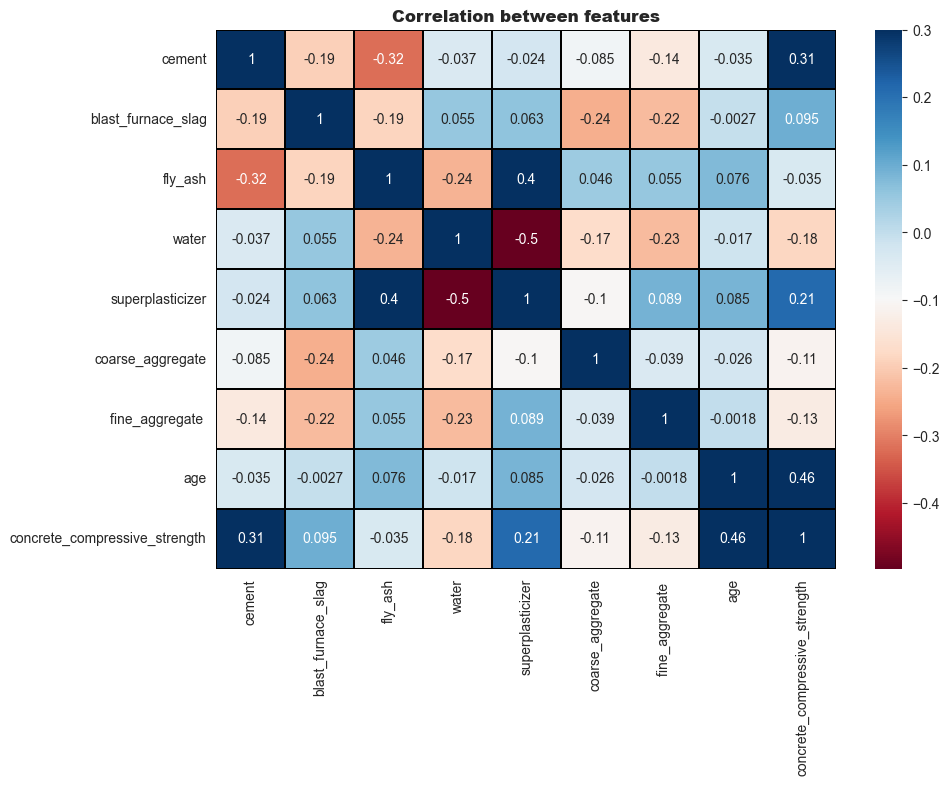

In [25]:
# Correlation heatmap
corr = dataset.corr(method='kendall')
plt.figure(figsize=(10, 7))
sns.heatmap(corr, vmax=.3, linewidths=0.05, annot=True, cmap='RdBu', linecolor="black")
plt.title('Correlation between features', weight = 'heavy')
plt.show()

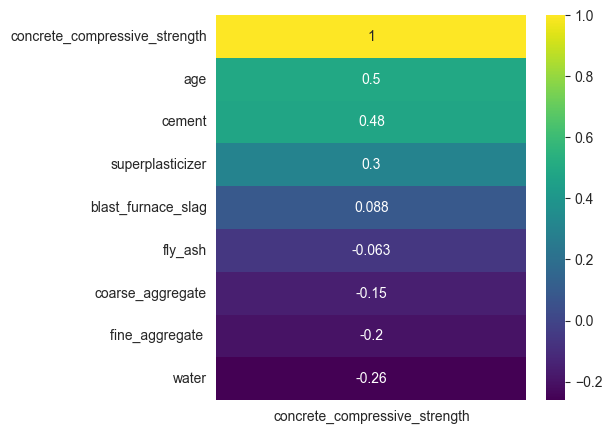

In [26]:
plt.figure(figsize=(5, 5)) 
heatmap = sns.heatmap(dataset.corr()[['concrete_compressive_strength']].sort_values(['concrete_compressive_strength'], ascending = False), annot = True, cmap = 'viridis')